# Investigating the Titanic survivor dataset

### Udacity - Data analyst nanodegree
### Project submission for "Investigate a dataset"
##### Gabor Galgocz

For this project my task was to investigate the Titanic survivor dataset that is available here:
https://www.kaggle.com/c/titanic/data

#### Source and purpose of the dataset

On this page we can also read more about the history of the Titanic. The text mentions that there were approximately 2224 passengers and crew on board, 1502 of them were killed. 722 survived, that is 32.5% of the people on board. 

The dataset is famous and widely used, on kaggle.com it is the base of the most popular competition for entry level data analysts, with more than 4000 entries for analyzing it. 

The Wikipedia article for Titanic (https://en.wikipedia.org/wiki/RMS_Titanic) states that there were approximately 1307 passengers on board, and 885 crew, this adds up to 2192, which is close to the earlier stated approximate figure of 2224.

Kaggle is hosting a competition for machine learning, and for the purposes of the competition, only the passenger list was used, since it has detailed information on the ticket prices, family status, etc. This makes it a very good, structured source of data, with several variables that can be examined. Also, for the purpose of using different machine learning algorithms, the data was split into training and testing data, and Udacity provided the only training data as a resource for this project. This explains why there are only 891 rows in the dataset used. 

So, after exploring the source and purpose of the dataset, let's load it into a dataframe and let's take a look at it ourselves!

The very first step is to import all the libraries that we will use later:

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and exploring the dataset

Now we load the csv to a Pandas dataframe and take a look at the first few rows to see the columns and some examples for values. 

In [4]:
titanic = pd.read_csv('titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Some column names are not entirely clear, so let's consult the source page on kaggle. Here's their explanation:

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                
Let's check the data types too, just in case we might need to consult it later:            

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We've seen at the previous step that in the "Cabin" column that there are missing values. Now let's check how many columns are affected and how many values are missing. 

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems like we have an almost complete dataset, with basically only two columns with missing data (and a third which has two values missing). Let's check how many rows are there.

In [7]:
len(titanic)

891

As we mentioned earlier, this is one of the two CSV files offered by kaggle, they've split the whole dataset into training and testing data for the purposes of the machine learning exercise. We see that the majority of values are missing in the "Cabin" row and a smaller proportion of values are missing in the "Age" column. I think we can conclude that we should ignore the "Cabin" column, since most of the values are missing and also it's not a variable that seems very useful. It is a string, and we don't know of any ways to make sense of it. 

As for the age, we will have to find a way to deal with the missing values.

Let's check if there are any other issues with the dataset.

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The .describe() function is a good way to test if the data can be trusted, because it would most probably reveal any extreme outliers which could be a result of manual error or other data corruption. Of course it will not reveal any data corruption that results in data looking similar to the real values.

The PassengerId column looks good, all the statistics there make sense, since it's just a series of number from 1 to 891. 

The Survived column looks good too, it's worth noting that it reveals that in this dataset the "survival rate" is 38.4%, which is pretty close to the overall survival rate of passengers (37.8% - source: https://upload.wikimedia.org/wikipedia/commons/6/69/Titanic_casualties.svg)
This is good news, it means that cutting the full dataset in half didn't skew the proportions considerably. This will allow us to use our conclusions as relevant to the full dataset. (Or, so to say, we can make sure that our sample is representative of the full population of Titanic passengers.)

Of course I could download the other CSV and merge the two datasets with the concat function, but then I would diverge from my original task, which is to analyze the provided dataset. 

The rest of the columns look good too, the statistics look reasonable, the only thing that caught my attention is the minimum value for Fare, which is 0. This can be explained though, maybe someone had a free ticket, but usually a minimum value of 0 for a price dimension might be a sign of missing data that was "corrected" by the introduction of 0.


### Dealing with missing values

Dealing with missing values is not an easy step, mostly because the reasons behind the missing values are mostly unclear, so the right "policy" is mostly based on guesswork. 

For more on this question, I found this comment very useful:
https://www.kaggle.com/c/titanic/forums/t/3189/dealing-with-missing-values-for-age-cabin/19003#post19003
The author writes that the missing values can be missing completely at random ("There is no pattern."), they can be missing at random ("There is a pattern.") or they can be Not missing at random (It is not random, but there is no pattern)

It is possible that the values are missing randomly - for babies for example, who were travelling without official documents. If we knew that the age is missing for babies, we could fill in the missing values with some reasonable replacement, for example 1. Since we have no information on why these values are missing, let's presume that they are randomly missing. So how to deal with them? 

I could come up with three ways of dealing with missing values. 

The easy way is to fill it up with NaN, this will not affect the min, max and mean values. 
The more advanced way is to find the mean of the existing values and fill the missing values with the average. This will not affect the mean in general, but it will distort the data if we start diving deeper.
The best way is to try to predict the missing values, based on other factors we know (gender, class). We should not use "Survived" as a factor to try to predict age, because in our example it is the dependent variable. This method would involve some predictive models, which are more advanced solutions so I will just mention them here.

There is also an alternative way, which is to remove the rows where the age is missing. This would remove 20% of our data. A decision needs to be made, to balance the reduction of sample size (which decreases the value of our conclusions) and the higher accuracy of our conclusions, since it will be all based on real data, and not something that was imputed with unknown accuracy.


#### My solution to deal with missing data
I want to check if removing the rows where the age values are missing would distort the distribution of other values in the dataset. I will create a new dataframe where I will drop the rows and I will compare the variables in the two dataframes.


In [9]:
titanic_missing_age_removed = titanic.dropna(subset=['Age'])   
titanic_missing_age_removed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This looks an acceptable solution, the two dataframes have their key statistics very close to each other. Let's just make one more test, let's create a histogram of the age variable for both dataframes to see if indeed we didn't introduce serious distortion to the dataset by removing 20% of the rows. 

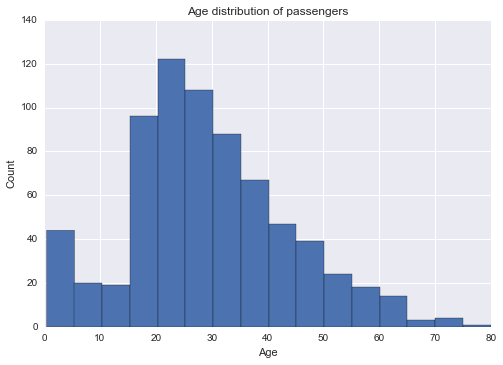

In [11]:
titanic['Age'].hist(bins=16)
plt.title("Age distribution of passengers")
plt.ylabel("Count")
plt.xlabel("Age")

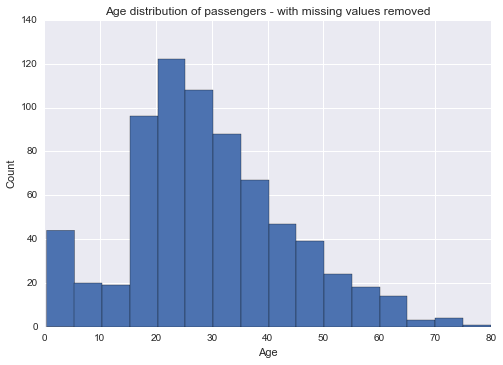

In [12]:
titanic_missing_age_removed['Age'].hist(bins=16)
plt.title("Age distribution of passengers - with missing values removed")
plt.ylabel("Count")
plt.xlabel("Age")

I don't see any differences between the two histograms, even after increasing the default binwidth to display a more refined distribution, and since we were already working with a sample, not the full dataset, I will go on with the new dataframe with no missing values for Age. Of course let's keep in mind that we have a smaller sample, when we evaluate our conclusions. 

## Univariate analysis

We can also take a moment now to take a look at the variables one by one, starting with the distribution of age groups. It's interesting to see that the most populated groups are the bins 20-25 and 25-30 years. Let's look at the distribution of other variables too. When we look at Sex and Pclass, we need to use a 'countplot' instead of a histogram, because we are dealing with categorical and not quantitative data. 

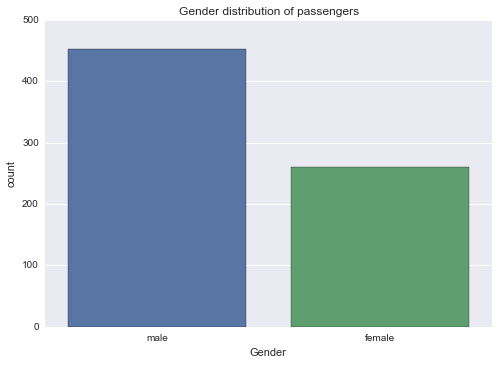

In [13]:
sns.countplot(x='Sex', data=titanic_missing_age_removed)
plt.title("Gender distribution of passengers")
plt.xlabel("Gender")

It is interesting that we have significantly more male than female passengers. 

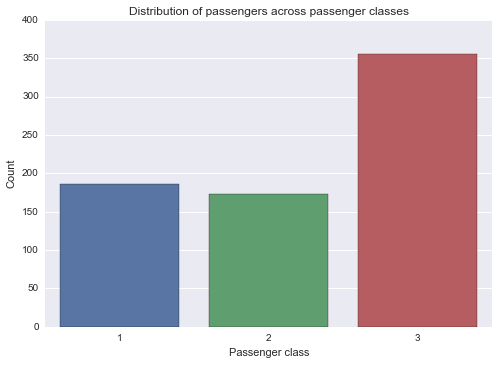

In [14]:
sns.countplot(x='Pclass', data=titanic_missing_age_removed)
plt.title("Distribution of passengers across passenger classes")
plt.ylabel("Count")
plt.xlabel("Passenger class")

It is a bit surprising that there are more passengers on first class than on second class. It is not surprising though that the most passengers were travelling on third class. 

Let's introduce our main research focus, our main question:

## Question: What factors made people more likely to survive?

To put it simply, we want to know if some groups of people had higher survival rates then others. A survival rate is easy to calculate in this dataset, it is the mean of the 'Survived' column, which can be computed for any subset of the dataset. This also brings us to the next phase of our exploration, where we will be dealing with two or more variables at a time (bi- and multivariate analysis).

Let's see how our dependent variable, the the survival rate (the mean of the variable 'Survived') varies across different independent variables. Let's start with gender. 

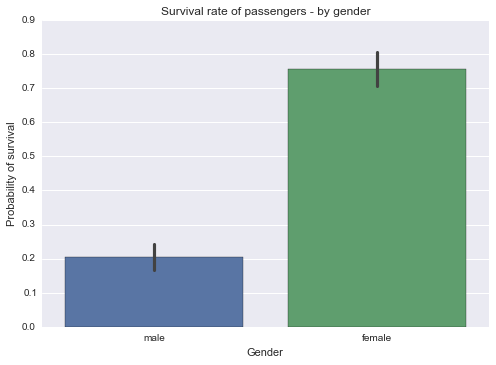

In [15]:
sns.barplot(x='Sex', y='Survived', data=titanic_missing_age_removed)
plt.title("Survival rate of passengers - by gender")
plt.ylabel("Probability of survival")
plt.xlabel("Gender")

There seems to be a huge difference between genders. Let's check the exact values. 

In [16]:
titanic_missing_age_removed.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.754789
male,0.205298


Wow. The difference is remarkable. Do we see similar differences in other variables too?

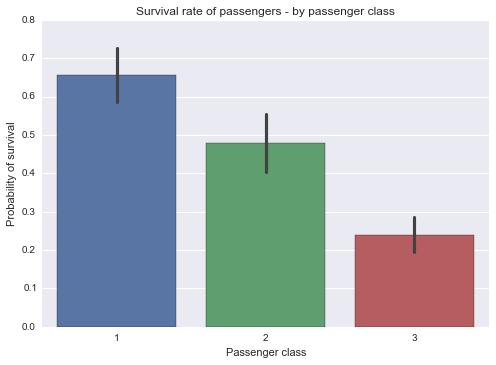

In [17]:
sns.barplot(x='Pclass', y='Survived', data=titanic_missing_age_removed)
plt.title("Survival rate of passengers - by passenger class")
plt.ylabel("Probability of survival")
plt.xlabel("Passenger class")

In [18]:
titanic_missing_age_removed.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.655914
2,0.479769
3,0.239437


The differences are considerable here too, but not as big as at the previous one. 

Seaborn also offers the possibility to introduce a third dimension to the plot, with the Hue parameter:

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

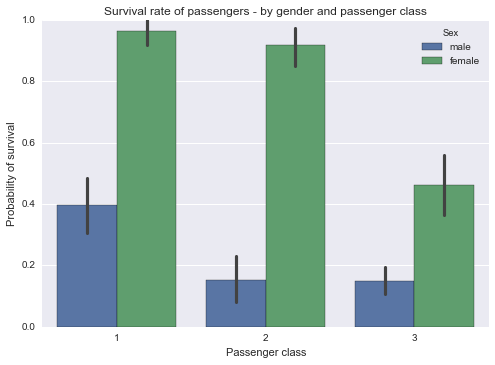

In [23]:
barplot = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_missing_age_removed)
plt.title("Survival rate of passengers - by gender and passenger class")
plt.ylabel("Probability of survival")
plt.xlabel("Passenger class")
barplot.savefig('output.png')

Now let's try to get the exact values. To calculate the survival rate across two dimensions, the easiest way is to use the pivot table function that is built in with Pandas:

In [62]:
titanic_missing_age_removed.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.964706,0.918919,0.460784
male,0.396040,0.151515,0.150198


There is a remarkable difference between the survival rates of women travelling on first class and men travelling on third class. 

Now let's look into age. First let's create a new column with age groups, so the plot will be easier to interpret.

In [53]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
titanic_missing_age_removed['age_group'] = pd.cut(titanic_missing_age_removed.Age, range(0, 100, 10), right=False, labels=labels)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


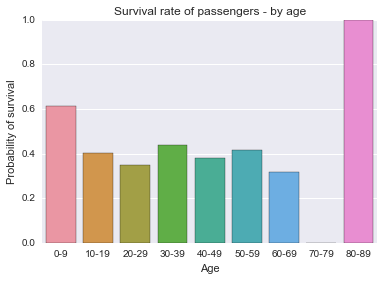

In [54]:
sns.barplot(x='age_group', y='Survived', data=titanic_missing_age_removed, ci=None)
plt.title("Survival rate of passengers - by age")
plt.ylabel("Probability of survival")
plt.xlabel("Age")

It is clear that children had the highest chances of survival, and for most groups there are no strong differences. The fact that in the last two groups the probability of survival is 0 or 1 can be attributed to the fact that only a few passengers belong to those bins. Let's check the values.

In [62]:
titanic_missing_age_removed.pivot_table('Survived', ['Sex', 'age_group'], 'Pclass')

Pclass                   1         2         3
Sex    age_group                              
female 0-9        0.000000  1.000000  0.523810
       10-19      1.000000  1.000000  0.541667
       20-29      0.937500  0.880000  0.483871
       30-39      1.000000  0.941176  0.437500
       40-49      1.000000  0.900000  0.000000
       50-59      0.916667  0.833333       NaN
       60-69      1.000000       NaN  1.000000
       70-79           NaN       NaN       NaN
       80-89           NaN       NaN       NaN
male   0-9        1.000000  1.000000  0.380952
       10-19      0.400000  0.100000  0.095238
       20-29      0.500000  0.000000  0.156863
       30-39      0.521739  0.096774  0.150943
       40-49      0.375000  0.125000  0.080000
       50-59      0.266667  0.000000  0.000000
       60-69      0.100000  0.333333  0.000000
       70-79      0.000000  0.000000  0.000000
       80-89      1.000000       NaN       NaN

This makes the examination of our variables very easy, we can discover the big differences in survival rates easily. Though one more information is missing: the number of people within each bin. I expect that some bins have many people, while some others have only a few or maybe just one. This would explain why some bins have a survival rate of 100% or 0%. When we try to understand the factors that influence the survival rate, we have to keep in mind the sample size, otherwise we might conclude that for older passengers travelling on third class the gender was the factor which fully determined survival or death, since males had 0% survival rate while females had 100%. 

In [63]:
titanic_missing_age_removed.pivot_table('Survived', ['Sex', 'age_group'], 'Pclass', aggfunc=len)

Pclass             1   2    3
Sex    age_group             
female 0-9         1   8   21
       10-19      13   8   24
       20-29      16  25   31
       30-39      27  17   16
       40-49      13  10    9
       50-59      12   6  NaN
       60-69       3 NaN    1
       70-79     NaN NaN  NaN
       80-89     NaN NaN  NaN
male   0-9         2   9   21
       10-19       5  10   42
       20-29      18  28  102
       30-39      23  31   53
       40-49      24   8   25
       50-59      15   9    6
       60-69      10   3    2
       70-79       3   1    2
       80-89       1 NaN  NaN

Now it's clear that there are many bins with only one of two passengers in them, so the sample size is so little that we cannot use these insights for our conclusion. One learning is that if we segment too much, along too many dimensions, the statistical significance decreases a lot, because in some bins the sample size is very small. We could investigate the relations between other variables too, ones that I didn't use now at all (for example the ones related to family size), but that would again lead to the same problem: if we slice along too many factors, we lose our significance. 

So what could be the solution? As I see it, the best would be to have an importance score for all the factors in the dataset, that would describe how much a factor could contribute to the survival rate of any individual. This leads us to machine learning, which was not part of the course, so I will just mention that there are several examples on Kaggle on how to implement it in Python. 

## Conclusion

We have explored the dataset, made a decision to remove 20% of the data points to get rid of missing values, and then used both pivot tables and plots to explore the survival rates among different groups. It seems like age was the most important factor that influenced survival rates, since we have seen the biggest difference between survival rates between men and women. Pclass was also a very important factor, we have seen the biggest differences in survival rates between women travelling on first class and men travelling on third class.

We have explored ways to segment even further, and also to use bins to group age values together, but we reached the conclusion that segmenting along too many dimensions will result in bins that have very few individuals in them, which makes their survival rate not useful for general conclusions.

The way forward is to use machine learning algorithms to assign importance scores to the factors, there are several resources on Kaggle which demonstrate this, but since that is not part of this particular course, I will leave that for later.
